SolrCloud Summary
=================

This notebook explores how to use Solr's APIs to gather information about the collections it hosts.

We start by using the [Cluster Status API](https://lucene.apache.org/solr/guide/6_6/collections-api.html#CollectionsAPI-clusterstatus) to enumerate the collections and shards.

In [66]:
import requests
import json
import pandas as pd

# Prevent web proxies from interfering:
proxies = {
  "http": None,
  "https": None,
}

r = requests.get("http://solr.api.wa.bl.uk/solr/admin/collections?action=CLUSTERSTATUS&wt=json&indent=true", proxies=proxies)

cs = json.loads(r.text)

# Enumerate the top-level keys in the cluster section:
for key in cs['cluster']:
    print(key)

# Process the collections data:
cols = cs['cluster']['collections']
cores = []
for col_name in cols:
    # Now loop on shards:
    for shard_name in cols[col_name]['shards']:
        # And finally on replicas/cores for each shard:
        for replica_name in cols[col_name]['shards'][shard_name]['replicas']:
            replica = cols[col_name]['shards'][shard_name]['replicas'][replica_name]
            cores.append([col_name, shard_name, replica_name, replica['node_name'],replica['state'], replica['leader'], replica['core']])

dfc = pd.DataFrame(cores, columns=["collection","shard","replica","node_name", "state","leader","core"])
dfc

collections
aliases
live_nodes


,collection,shard,replica,node_name,state,leader,core
0,NPLD-FC2017-20190228,shard1,core_node6,192.168.1.73:9001_solr,active,true,NPLD-FC2017-20190228_shard1_replica2
1,NPLD-FC2017-20190228,shard2,core_node7,192.168.1.73:9002_solr,active,true,NPLD-FC2017-20190228_shard2_replica2
2,NPLD-FC2017-20190228,shard3,core_node8,192.168.1.73:9003_solr,active,true,NPLD-FC2017-20190228_shard3_replica2
3,NPLD-FC2017-20190228,shard4,core_node9,192.168.1.73:9004_solr,active,true,NPLD-FC2017-20190228_shard4_replica2
4,NPLD-FC2017-20190228,shard5,core_node10,192.168.1.73:9005_solr,active,true,NPLD-FC2017-20190228_shard5_replica2
5,NPLD-FC2014-20190221,shard1,core_node4,192.168.1.73:8998_solr,active,true,NPLD-FC2014-20190221_shard1_replica2
6,NPLD-FC2014-20190221,shard2,core_node5,192.168.1.73:8999_solr,active,true,NPLD-FC2014-20190221_shard2_replica2
7,NPLD-FC2014-20190221,shard3,core_node6,192.168.1.73:9000_solr,active,true,NPLD-FC2014-20190221_shard3_replica2
8,NPLD-DC2016-20190315,shard1,core_node14,192.168.1.73:9030_solr,active,true,NPLD-DC2016-20190315_shard1_replica2
9,NPLD-DC2016-20190315,shard2,core_node15,192.168.1.73:9031_solr,active,true,NPLD-DC2016-20190315_shard2_replica2


We can now get the MBeans summary for every shard. Note that in our setup, every shard runs in it's own server, so there's a 1:1 mapping between server-level entities like caches and individual cores. This makes collecting the data a little simpler, as we don't need to separate per-server and per-shard information.

In [23]:
mbeans = {}

for row in dfc.iterrows():
    replica_core_name = row.core
    print("Inspecting core: %s..." % replica_core_name)
    r = requests.get("http://solr.api.wa.bl.uk/solr/%s/admin/mbeans?stats=true&wt=json&indent=true" % replica_core_name , proxies=proxies)
    print(r.text[:100])
    result = json.loads(r.text)
    mbeans[replica_core_name] = result['solr-mbeans']


Inspecting core: NPLD-FC2017-20190228_shard1_replica2...
{
  "responseHeader":{
    "status":0,
    "QTime":9},
  "solr-mbeans":[
    "CONTAINER",{},
    "AD
Inspecting core: NPLD-FC2017-20190228_shard2_replica2...
{
  "responseHeader":{
    "status":0,
    "QTime":1781},
  "solr-mbeans":[
    "CONTAINER",{},
    
Inspecting core: NPLD-FC2017-20190228_shard3_replica2...
{
  "responseHeader":{
    "status":0,
    "QTime":10383},
  "solr-mbeans":[
    "CONTAINER",{},
   
Inspecting core: NPLD-FC2017-20190228_shard4_replica2...
{
  "responseHeader":{
    "status":0,
    "QTime":4640},
  "solr-mbeans":[
    "CONTAINER",{},
    
Inspecting core: NPLD-FC2017-20190228_shard5_replica2...
{
  "responseHeader":{
    "status":0,
    "QTime":4237},
  "solr-mbeans":[
    "CONTAINER",{},
    
Inspecting core: NPLD-FC2014-20190221_shard1_replica2...
{
  "responseHeader":{
    "status":0,
    "QTime":4330},
  "solr-mbeans":[
    "CONTAINER",{},
    
Inspecting core: NPLD-FC2014-20190221_shard2_replica

{
  "responseHeader":{
    "status":0,
    "QTime":233},
  "solr-mbeans":[
    "CONTAINER",{},
    "
Inspecting core: NPLD-FC2018-20190218_shard10_replica1...
{
  "responseHeader":{
    "status":0,
    "QTime":633},
  "solr-mbeans":[
    "CONTAINER",{},
    "
Inspecting core: NPLD-FC2018-20190218_shard11_replica2...
{
  "responseHeader":{
    "status":0,
    "QTime":242},
  "solr-mbeans":[
    "CONTAINER",{},
    "
Inspecting core: NPLD-FC2018-20190218_shard12_replica2...
{
  "responseHeader":{
    "status":0,
    "QTime":173},
  "solr-mbeans":[
    "CONTAINER",{},
    "
Inspecting core: NPLD-FC2018-20190218_shard13_replica2...
{
  "responseHeader":{
    "status":0,
    "QTime":384},
  "solr-mbeans":[
    "CONTAINER",{},
    "
Inspecting core: NPLD-FC2018-20190218_shard14_replica2...
{
  "responseHeader":{
    "status":0,
    "QTime":74},
  "solr-mbeans":[
    "CONTAINER",{},
    "A
Inspecting core: NPLD-FC2018-20190218_shard15_replica2...
{
  "responseHeader":{
    "status":0,
    "QT

We can now select some of this data to add in as columns in the main dataframe.

In [68]:
def add_stat(row, stat):
    replica_core_name = row.core
    parts = mbeans[replica_core_name][::2]
    values = mbeans[replica_core_name][1::2]
    core_data = {}
    for i in range(0, len(parts)):
        core_data[parts[i]] = values[i]
    if stat == 'size_in_bytes':
        return core_data['CORE']['core']['stats']['sizeInBytes']
    elif stat == 'num_docs':
        return core_data['CORE']['searcher']['stats']['numDocs']
    elif stat == 'fc_hit_ratio':
        return core_data['CACHE']['filterCache']['stats']['hitratio']
    elif stat == 'q_select_art':
        return core_data['QUERY']['/select']['stats']['avgTimePerRequest']
    elif stat == 'q_select_95prt':
        return core_data['QUERY']['/select']['stats']['95thPcRequestTime']
    else:
        raise Exception("Uknown stat: %s!" % stat)

# Add in columns derived from MBeans data
for stat in ['num_docs', 'size_in_bytes','fc_hit_ratio', 'q_select_art', 'q_select_95prt']:
    dfc[stat] = dfc.apply (lambda row: add_stat(row, stat), axis=1)
    
dfc

,collection,shard,replica,node_name,state,leader,core,num_docs,size_in_bytes,fc_hit_ratio,q_select_art,q_select_95prt
0,NPLD-FC2017-20190228,shard1,core_node6,192.168.1.73:9001_solr,active,true,NPLD-FC2017-20190228_shard1_replica2,83765301,517264569610,0.95,1595.784972,8478.073878
1,NPLD-FC2017-20190228,shard2,core_node7,192.168.1.73:9002_solr,active,true,NPLD-FC2017-20190228_shard2_replica2,83764534,516690109271,0.95,1584.998631,8768.303439
2,NPLD-FC2017-20190228,shard3,core_node8,192.168.1.73:9003_solr,active,true,NPLD-FC2017-20190228_shard3_replica2,83761827,517124828984,0.95,1554.339627,8354.985837
3,NPLD-FC2017-20190228,shard4,core_node9,192.168.1.73:9004_solr,active,true,NPLD-FC2017-20190228_shard4_replica2,83766299,516967329322,0.95,1731.682015,8369.849226
4,NPLD-FC2017-20190228,shard5,core_node10,192.168.1.73:9005_solr,active,true,NPLD-FC2017-20190228_shard5_replica2,83673750,516381638274,0.95,1730.481429,8076.846160
5,NPLD-FC2014-20190221,shard1,core_node4,192.168.1.73:8998_solr,active,true,NPLD-FC2014-20190221_shard1_replica2,112560671,812368769590,0.95,2135.845284,9993.319050
6,NPLD-FC2014-20190221,shard2,core_node5,192.168.1.73:8999_solr,active,true,NPLD-FC2014-20190221_shard2_replica2,112544915,812386820004,0.95,2045.188546,9744.005160
7,NPLD-FC2014-20190221,shard3,core_node6,192.168.1.73:9000_solr,active,true,NPLD-FC2014-20190221_shard3_replica2,112164235,809938423936,0.95,2063.606043,7979.619988
8,NPLD-DC2016-20190315,shard1,core_node14,192.168.1.73:9030_solr,active,true,NPLD-DC2016-20190315_shard1_replica2,107782624,496649951768,0.05,1417.912772,4601.957548
9,NPLD-DC2016-20190315,shard2,core_node15,192.168.1.73:9031_solr,active,true,NPLD-DC2016-20190315_shard2_replica2,107792282,503738797575,0.05,1534.578911,5934.954400


Similarly, we add in our own mappings so we have a short name for each server:

In [87]:
def add_server_name(row):
    if '192.168.1.71' in row.node_name:
        return 'solr_1'
    elif '192.168.1.72' in row.node_name:
        return 'solr_2'
    elif '192.168.1.73' in row.node_name:
        return 'solr_3'
    else:
        'unknown'

dfc['server_name'] = dfc.apply (lambda row: add_server_name(row), axis=1)
dfc

,collection,shard,replica,node_name,state,leader,core,num_docs,size_in_bytes,fc_hit_ratio,q_select_art,q_select_95prt,server_name
0,NPLD-FC2017-20190228,shard1,core_node6,192.168.1.73:9001_solr,active,true,NPLD-FC2017-20190228_shard1_replica2,83765301,517264569610,0.95,1595.784972,8478.073878,solr_3
1,NPLD-FC2017-20190228,shard2,core_node7,192.168.1.73:9002_solr,active,true,NPLD-FC2017-20190228_shard2_replica2,83764534,516690109271,0.95,1584.998631,8768.303439,solr_3
2,NPLD-FC2017-20190228,shard3,core_node8,192.168.1.73:9003_solr,active,true,NPLD-FC2017-20190228_shard3_replica2,83761827,517124828984,0.95,1554.339627,8354.985837,solr_3
3,NPLD-FC2017-20190228,shard4,core_node9,192.168.1.73:9004_solr,active,true,NPLD-FC2017-20190228_shard4_replica2,83766299,516967329322,0.95,1731.682015,8369.849226,solr_3
4,NPLD-FC2017-20190228,shard5,core_node10,192.168.1.73:9005_solr,active,true,NPLD-FC2017-20190228_shard5_replica2,83673750,516381638274,0.95,1730.481429,8076.846160,solr_3
5,NPLD-FC2014-20190221,shard1,core_node4,192.168.1.73:8998_solr,active,true,NPLD-FC2014-20190221_shard1_replica2,112560671,812368769590,0.95,2135.845284,9993.319050,solr_3
6,NPLD-FC2014-20190221,shard2,core_node5,192.168.1.73:8999_solr,active,true,NPLD-FC2014-20190221_shard2_replica2,112544915,812386820004,0.95,2045.188546,9744.005160,solr_3
7,NPLD-FC2014-20190221,shard3,core_node6,192.168.1.73:9000_solr,active,true,NPLD-FC2014-20190221_shard3_replica2,112164235,809938423936,0.95,2063.606043,7979.619988,solr_3
8,NPLD-DC2016-20190315,shard1,core_node14,192.168.1.73:9030_solr,active,true,NPLD-DC2016-20190315_shard1_replica2,107782624,496649951768,0.05,1417.912772,4601.957548,solr_3
9,NPLD-DC2016-20190315,shard2,core_node15,192.168.1.73:9031_solr,active,true,NPLD-DC2016-20190315_shard2_replica2,107792282,503738797575,0.05,1534.578911,5934.954400,solr_3


Now we can start to do some analysis, like totaling up the index sizes by server:

In [106]:
dfc.groupby(['server_name'])['size_in_bytes'].sum().reset_index()

,server_name,size_in_bytes
0,solr_1,5268675543193
1,solr_2,14142849370645
2,solr_3,29713358862996


To summarise:

- `solr_1` has 5.2TB of indexes (but only half that queried at any given time) and has 512GB RAM and X CPUs. 
- `solr_2` has 14TB of indexes, 256GB of RAM, and X CPUs.
- `solr_3` has 30TB of indexes, 512GB of RAM, and X CPUs.

For comparison, our Danish collegues run with c. 22TB of index per 256GB of RAM. They have about 900GB of index per shard and per drive, mounting each drive individually. Each Solr runs with 8GB heap (using roughly 3-5GB).

We start by looking at the number of documents and the sizes of each core.  We attempt to peg the number of documents for each core at about 100,000, and then Solr distributes the docs within each collection, so the different dots for each core tend to lie on top of eachother.

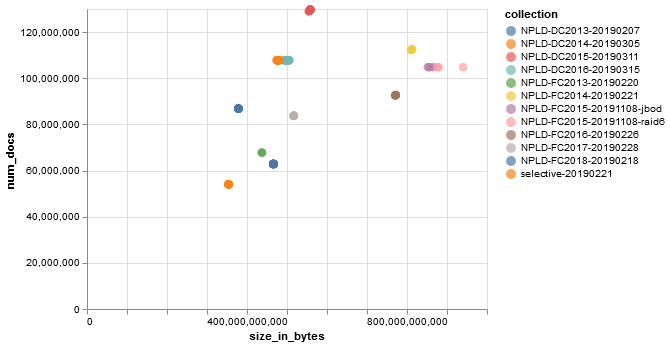

In [91]:
import altair as alt
alt.renderers.enable('notebook')

alt.Chart(dfc).mark_circle(size=75).encode(
    alt.X('size_in_bytes'),
    alt.Y('num_docs'),
    color='collection',
    tooltip=['size_in_bytes', 'num_docs', 'collection', 'server_name']
)

Some correlation there, i.e. more documents per shard giving larger shards, but a lot of variation so other factors are also at play.

We an also look at the average response time versus shard size. If we were largely I/O bound, and bound by the speed we can read a core, rather than any contention, we would expect this to be linear.

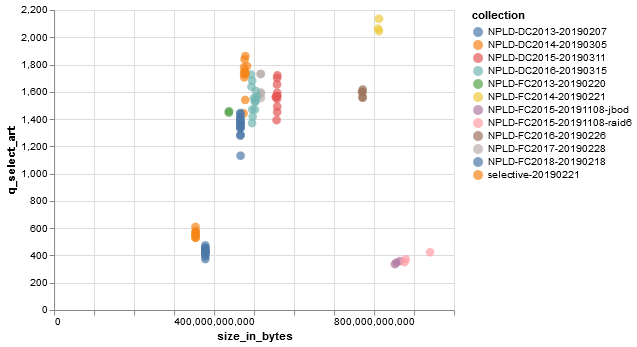

In [92]:
alt.Chart(dfc).mark_circle(size=75).encode(
    alt.X('size_in_bytes'),
    alt.Y('q_select_art'),
    color='collection',
    tooltip=['size_in_bytes', 'q_select_art', 'collection', 'server_name']
)

Very broadly, the larger cores have longer query averate query times, but `jbod` and `raid6` collections (which are running on `solr_1` and so have a lot more RAM and CPU per TB of index) are both the largest and fastest systems.

We set up the `jbod` and `raid6` collections to evaluate the use of separate disks per shard (`jbod`), but while the `jbod` is slightly quicker, but there's not a lot in it.  Other factors appear to be dominating.

We believe the RAID6 disk speed is comparible across all, so this is consistent with OS-level RAM caching or additional CPU power being of benefit.

If we plot the same chart but look at the 95th percentile response time...

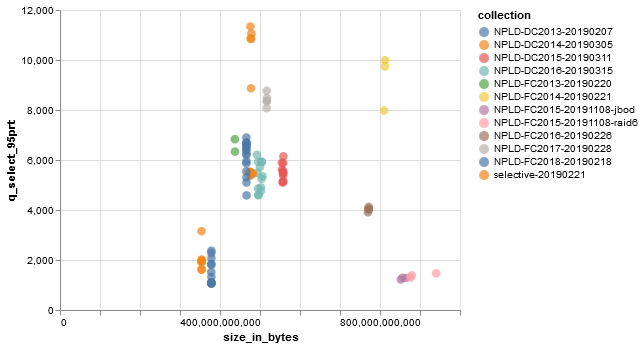

In [93]:
alt.Chart(dfc).mark_circle(size=75).encode(
    alt.X('size_in_bytes'),
    alt.Y('q_select_95prt'),
    color='collection',
    tooltip=['size_in_bytes', 'q_select_95prt', 'collection', 'server_name']
)

We get a very similar picture.

We can try expressing this in terms of the number of documents, and colour the plot by server name to see if that is clearer.

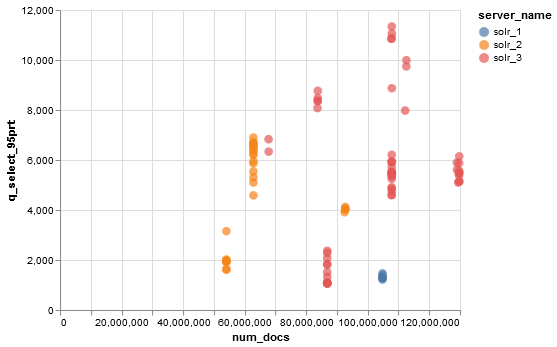

In [118]:
alt.Chart(dfc).mark_circle(size=75).encode(
    alt.X('num_docs'),
    alt.Y('q_select_95prt'),
    color='server_name',
    tooltip=['num_docs', 'q_select_95prt', 'collection', 'node_name']
)

So, overall `solr_1` is always nice and fast, but `solr_2` and `solr_3` are slower. The `solr_3` results to appear the worst of all, but the spread is so wide it's not clear how systematic this is.

One additional factor that may be at play here is the size of the caches, especially the filter cache which should assist faceting performance by caching which documents are under which facets.

We can estimate how much pressure the filter cache is under by looking at the _hit ratio_ (i.e. the fraction of times that the filter cache has what we need, which ideally should be close to `1.0`):

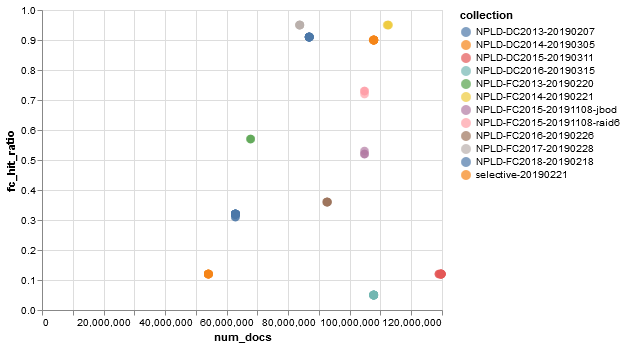

In [94]:
alt.Chart(dfc).mark_circle(size=75).encode(
    alt.X('num_docs'),
    alt.Y('fc_hit_ratio'),
    color='collection',
    tooltip=['num_docs', 'fc_hit_ratio', 'collection', 'server_name']
)

Really no kind of correlation there. So lets try correlating it with the average response times:

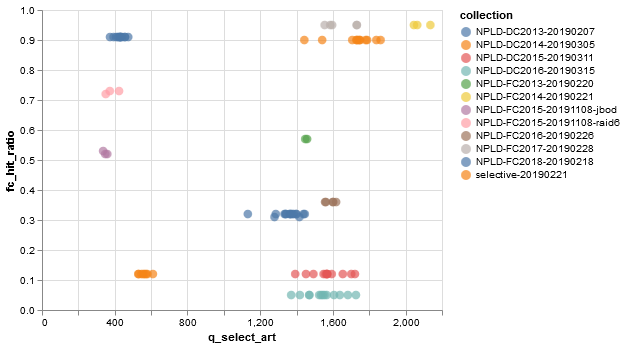

In [120]:
alt.Chart(dfc).mark_circle(size=75).encode(
    alt.X('q_select_art'),
    alt.Y('fc_hit_ratio'),
    color='collection',
    tooltip=['q_select_art', 'fc_hit_ratio', 'collection', 'server_name']
)

Again, no apparent trend. We have both fast and slow response time averages for both high and low hit ratios.

We can try some aggregations to see if the distributed queries appear to be having an effect. Here, we total up the sizes for each collection and find the average of the 96th percentile response times...

In [123]:
dfcs = dfc.groupby(['collection']).agg({'size_in_bytes':'sum', 'q_select_95prt':'mean', 'fc_hit_ratio':'mean'}).reset_index()
dfcs

,collection,size_in_bytes,q_select_95prt,fc_hit_ratio
0,NPLD-DC2013-20190207,4917689001135,1516.615883,0.910000
1,NPLD-DC2014-20190305,5724123175390,7605.858998,0.900000
2,NPLD-DC2015-20190311,6686585790192,5527.468550,0.120000
3,NPLD-DC2016-20190315,6491418409681,5347.432874,0.050000
4,NPLD-FC2013-20190220,874419997607,6584.296621,0.570000
5,NPLD-FC2014-20190221,2434694013530,9238.981399,0.950000
6,NPLD-FC2015-20191108-jbod,2572941312259,1264.434046,0.523333
7,NPLD-FC2015-20191108-raid6,2695734230934,1387.075073,0.726667
8,NPLD-FC2016-20190226,3855937748413,4028.637884,0.360000
9,NPLD-FC2017-20190228,2584428475461,8409.611708,0.950000


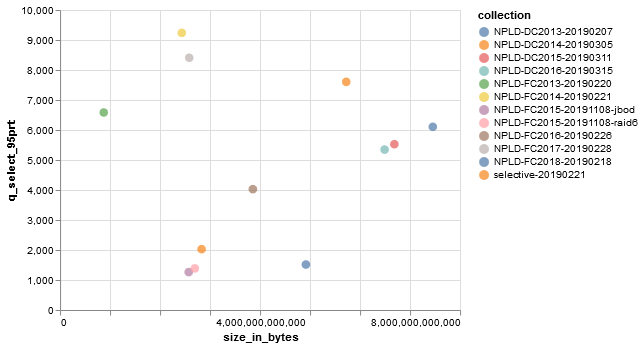

In [122]:
alt.Chart(dfcs).mark_circle(size=75).encode(
    alt.X('size_in_bytes'),
    alt.Y('q_select_95prt'),
    color='collection',
    tooltip=['size_in_bytes', 'q_select_95prt', 'collection']
)

Again, no clear trend. So lets try this averaged response time verus hit ratio.

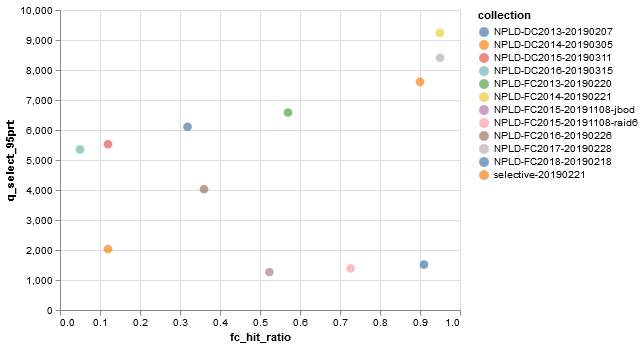

In [124]:
alt.Chart(dfcs).mark_circle(size=75).encode(
    alt.X('fc_hit_ratio'),
    alt.Y('q_select_95prt'),
    color='collection',
    tooltip=['fc_hit_ratio', 'q_select_95prt', 'collection']
)

No clear trend. 

Summary
--------------

We have seen that having much more RAM and CPU per TB of index appears to improve performance times. Beyond that, things are unclear.

The main problem here is that we only have access to service-level stats, e.g. averages over long times, and lots of different query types and trials.  To confidently probe into the details of what's happening, we need to run more controlled benchmarks that exercise specific features independently.
